In [1]:
!nvidia-smi
%load_ext autoreload
%autoreload 2

Mon Oct 21 10:22:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA TITAN RTX               On  | 00000000:1A:00.0 Off |                  N/A |
| 41%   33C    P8              15W / 280W |      1MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [164]:
from main import main

config = {'encoder_type': 'sentence-transformers/sentence-t5-large',
          'num_individuals': 400,
          'embedding_dim': 512,
          'projector_hidden_layers': [],
          'dropout': 0.2,
          'batch_size': 256,
          'lr': 1e-4,
          'min_lr': 1e-4,
          'val_split': 0.2,
          'scheduler_patience': 5,
          'early_stopping_patience': 10,
          'epochs': 100,
          'margin': 0.2,
          }

output = main(config, log_wandb=False)


Running the script with the following config:
- num_individuals: 400
- answer_type: candidates
- only_full: True
- replace_nan: False
- clip_values: True
- remove_neutral: True
- encoder_type: sentence-transformers/sentence-t5-large
- embedding_dim: 512
- projector_hidden_layers: []
- dropout: 0.2
- val_split: 0.2
- split_mode: random
- epochs: 100
- batch_size: 256
- lr: 0.0001
- margin: 0.2
- scheduler_patience: 5
- scheduler_factor: 0.1
- min_lr: 0.0001
- early_stopping_patience: 10
- multigpu: True
2 GPUs detected. Using cuda.
Use pytorch device_name: cuda
Load pretrained SentenceTransformer: sentence-transformers/sentence-t5-large


/itet-stor/fberdoz/net_scratch/conda_envs/pytcu11/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



Loading data...
Data loaded.


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Starting training...
Epoch   1/100 (4.59s) | Train: loss 0.8432, acc 55.14 | Validation: loss 0.7842, acc 56.40 | lr 1.0e-04
Epoch   2/100 (4.56s) | Train: loss 0.7597, acc 58.89 | Validation: loss 0.7622, acc 56.64 | lr 1.0e-04
Epoch   3/100 (4.56s) | Train: loss 0.7288, acc 59.60 | Validation: loss 0.7441, acc 56.87 | lr 1.0e-04
Epoch   4/100 (4.57s) | Train: loss 0.6995, acc 60.31 | Validation: loss 0.7153, acc 58.32 | lr 1.0e-04
Epoch   5/100 (4.57s) | Train: loss 0.6504, acc 66.21 | Validation: loss 0.6570, acc 66.37 | lr 1.0e-04
Epoch   6/100 (4.57s) | Train: loss 0.5883, acc 73.67 | Validation: loss 0.5994, acc 71.87 | lr 1.0e-04
Epoch   7/100 (4.57s) | Train: loss 0.5368, acc 77.54 | Validation: loss 0.5555, acc 74.76 | lr 1.0e-04
Epoch   8/100 (4.58s) | Train: loss 0.4988, acc 78.61 | Validation: loss 0.5235, acc 75.46 | lr 1.0e-04
Epoch   9/100 (4.57s) | Train: loss 0.4725, acc 78.99 | Validation: loss 0.5035, acc 75.25 | lr 1.0e-04
Epoch  10/100 (4.59s) | Train: loss 0.4544,

In [166]:
model = output['model'].module.to('cpu')
ds_tr = output['dataset_tr']
ds_val = output['dataset_val']

In [159]:
import torch
i, q, e_q, y = ds_tr[0]

with torch.no_grad():
    similarity = torch.cosine_similarity(model.agree(i), model.disagree(i), dim=-1)
    print(similarity)

tensor(-0.9744)


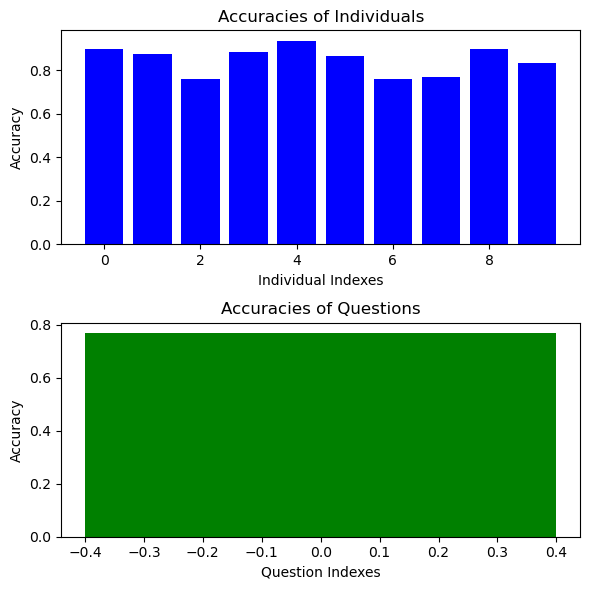

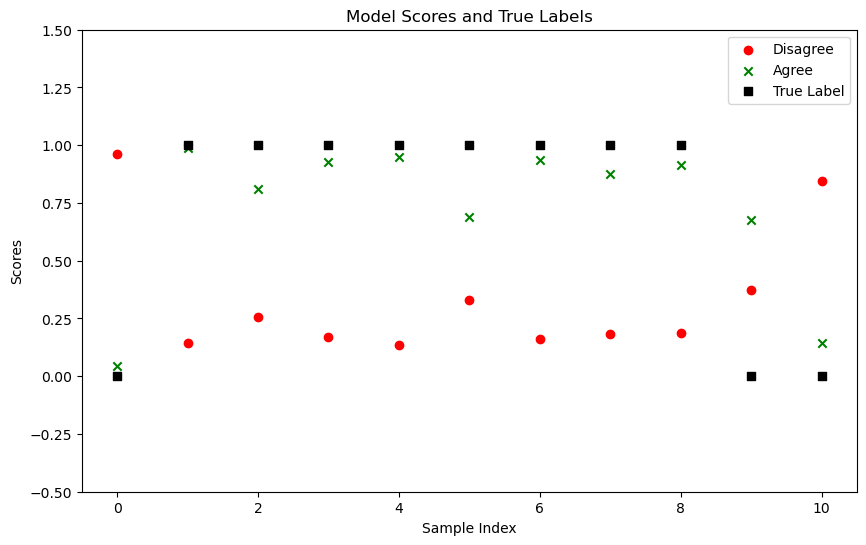

In [175]:
from helpers import evaluate, visualize_scores
evaluate(model, ds_tr, metric='accuracy', n_individuals=10, n_questions=1)
#evaluate(model, ds_val, metric='accuracy', n_individuals=10)
visualize_scores(model, ds_val, value=4, index=0)


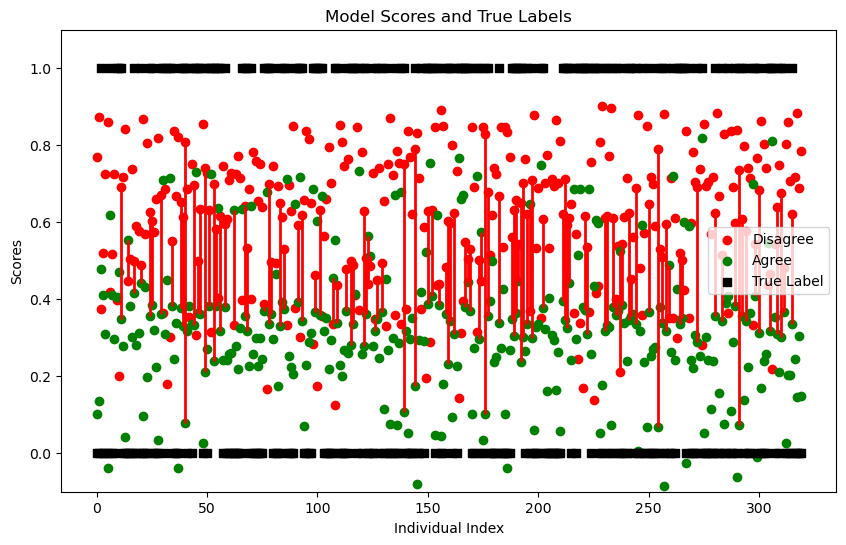

In [198]:
visualize_scores(model, ds_tr, value=49, index=1)

Use pytorch device_name: cuda
Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L12-v2


/itet-stor/fberdoz/net_scratch/conda_envs/pytcu11/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



Batches:   0%|          | 0/3 [00:00<?, ?it/s]

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '10'}>,
        <Axes: title={'center': '11'}>, <Axes: title={'center': '12'}>,
        <Axes: title={'center': '13'}>, <Axes: title={'center': '14'}>,
        <Axes: title={'center': '15'}>, <Axes: title={'center': '16'}>,
        <Axes: title={'center': '17'}>],
       [<Axes: title={'center': '18'}>, <Axes: title={'center': '19'}>,
        <Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>,
        <Axes: title={'center': '24'}>, <Axes: title={'center': '25'}>,
        <Axes: title={'center': '26'}>],
       [<Axes: title={'

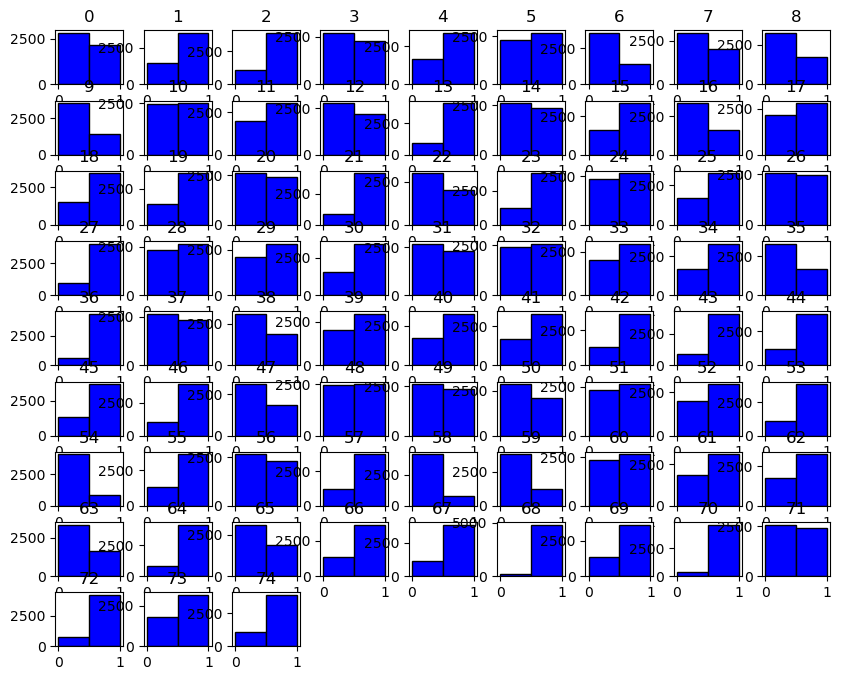

In [183]:
from helpers import plot_cosine_similarity_heatmap, load_VQA_data

df_v, df_c, df_q = load_VQA_data(replace_nan=False, clip_values=True, only_full=True, remove_neutral=False)
    
plot_cosine_similarity_heatmap('sentence-transformers/all-MiniLM-L12-v2', df_q)

# Histogram of answers
df_c.hist(bins=2, figsize=(10, 8), color='blue', edgecolor='black', grid=False)

In [127]:
from helpers import build_all
_, _, df_q = build_all(clean=True, verbose=False)

df_q.head()

,ID_election,ID_question,question_DE,question_FR,question_IT,question_EN,category,tag_1,tag_2,tag_3,...,cleavage_4,cleavage_5,cleavage_6,cleavage_7,cleavage_8,info_DE,pro_DE,contra_DE,_category,_n_options
0,1057,32214,Befürworten Sie eine Erhöhung des Rentenalters...,Êtes-vous favorable à une augmentation de l'âg...,È favorevole all’innalzamento dell’età pension...,Do you support an increase in the retirement a...,11451,2,1,168.0,...,NaN,NaN,NaN,-1.0,NaN,<p>Die Alters- und Hinterlassenenversicherung ...,"<p dir=""ltr"">Das Rentensystem muss aufgrund de...","<p dir=""ltr"">Die Erh&ouml;hung des Rentenalter...",Welfare state & family,4
1,1057,32215,Soll der Staat mehr Mittel für die Krankenkass...,L'État doit-il allouer davantage de moyens à l...,Ritiene che lo Stato dovrebbe stanziare più me...,Should the federal government allocate more fu...,11451,168,122,7.0,...,NaN,NaN,NaN,1.0,NaN,"<p dir=""ltr"">Die Krankenkassenpr&auml;mie ist ...","<p dir=""ltr"">Die Kosten der Krankenkassenpr&au...","<p dir=""ltr"">Die Kantone sind zust&auml;ndig f...",Welfare state & family,4
2,1057,32216,Bei Ehepaaren ist die Höhe der Rente heute auf...,"Pour les couples mariés, le montant de la rent...","Per le coppie di coniugi, l’ammontare della re...","For married couples, the pension is currently ...",11451,168,169,171.0,...,NaN,NaN,NaN,1.0,NaN,"<p dir=""ltr"">Die AHV ist die Erste S&auml;ule ...","<p dir=""ltr"">Die Plafonierung der AHV benachte...","<p dir=""ltr"">Die Aufhebung der Plafonierung be...",Welfare state & family,4
3,1057,32217,Im Rahmen der BVG-Reform sollen die Renten gek...,"Dans le cadre de la réforme de la LPP, les ren...",La riforma della LPP prevede una riduzione del...,As part of the reform of the BVG (occupational...,11451,168,170,171.0,...,NaN,NaN,NaN,-1.0,NaN,"<p dir=""ltr"">Die obligatorische berufliche Vor...",NaN,NaN,Welfare state & family,4
4,1057,32218,Soll die bezahlte Elternzeit von heute 14 Woch...,Faut-il étendre le congé rémunéré pour les par...,Ritiene che il congedo parentale retribuito do...,Should paid parental leave be increased beyond...,11451,168,3,172.0,...,NaN,NaN,NaN,1.0,NaN,"<p dir=""ltr"">In der Schweiz k&ouml;nnen Frauen...","<ul>\n<li dir=""ltr"" aria-level=""1"">\n<p dir=""l...","<ul>\n<li dir=""ltr"" aria-level=""1"">\n<p dir=""l...",Welfare state & family,4


# Creating the config file

In [ ]:
from helpers import write_yaml_experiments
from models import SUPPORTED_ENCODER_MODELS

configs = [{'encoder_type': m} for m in SUPPORTED_ENCODER_MODELS]

#write_yaml_experiments(configs, 'config_array.yaml')

# Visualizing the embeddings

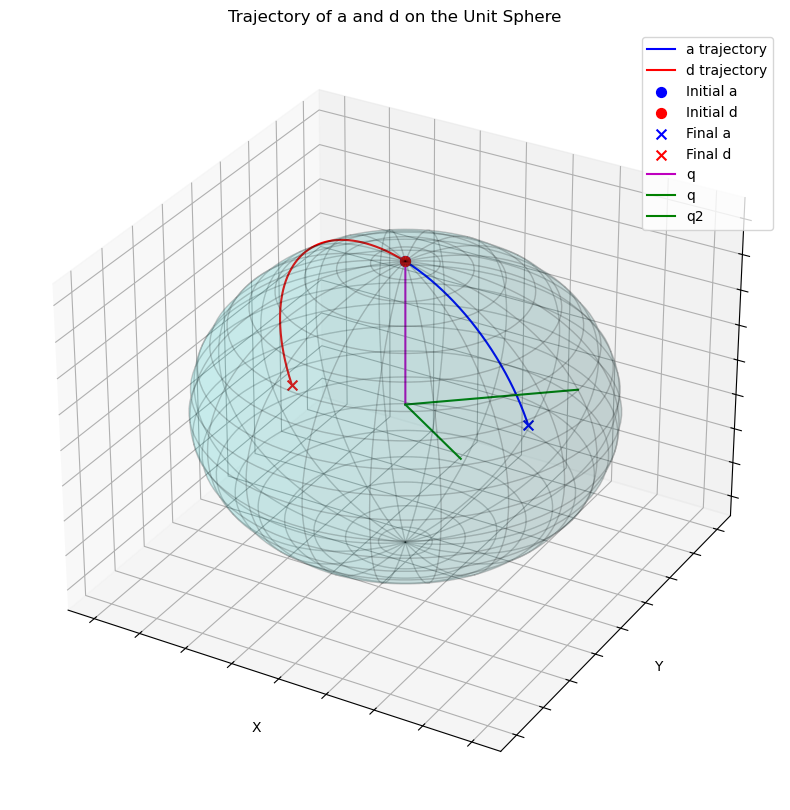

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to normalize a vector to unit norm
def normalize(v):
    return v / np.linalg.norm(v)

# Function to compute cosine similarity between two vectors
def cosine_similarity(v1, v2):
    return np.dot(v1, v2)

# Initialize vectors
a = normalize(np.array([0,0,1]))  # Random 3D unit vector
d = a.copy()  # Copy of a
q1 = normalize(np.array([1,0,0.5]))  # Another random 3D unit vector
q2 = normalize(np.array([1,-1,0.5])) 

# SGD parameters
learning_rate = 0.01
num_steps = 1000

# Store the trajectory of a and d for plotting
trajectory_a = [a.copy()]
trajectory_d = [d.copy()]

# SGD loop
for step in range(num_steps):
    # Compute cosine similarities
    cos_sim_aq1 = cosine_similarity(a, q1)
    cos_sim_dq1 = cosine_similarity(d, q1)
    cos_sim_aq2 = cosine_similarity(a, q2)
    cos_sim_dq2 = cosine_similarity(d, q2)
    
    grad_a = -2 * (0.5*((q1 - cos_sim_aq1 * a) + (q2 - cos_sim_aq2 * a)))  # To increase similarity between a and q
    grad_d = 2 * (0.5*((q1 - cos_sim_dq1 * d) + (q2 - cos_sim_dq2 * d)))    
    
    # Update a and d
    a -= learning_rate * grad_a
    d -= learning_rate * grad_d
    
    # Normalize a and d to unit norm
    a = normalize(a)
    d = normalize(d)
    
    # Store trajectories
    trajectory_a.append(a.copy())
    trajectory_d.append(d.copy())

# Convert trajectories to arrays
trajectory_a = np.array(trajectory_a)
trajectory_d = np.array(trajectory_d)

# Plot the trajectories of a and d on the unit sphere
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot unit sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='c', alpha=0.1, rstride=5, cstride=5, edgecolor='k')

# Plot trajectories
ax.plot(trajectory_a[:, 0], trajectory_a[:, 1], trajectory_a[:, 2], label='a trajectory', color='b')
ax.plot(trajectory_d[:, 0], trajectory_d[:, 1], trajectory_d[:, 2], label='d trajectory', color='r')

# Initial and final points
ax.scatter(*trajectory_a[0], color='b', s=50, label='Initial a', marker='o')
ax.scatter(*trajectory_d[0], color='r', s=50, label='Initial d', marker='o')
ax.scatter(*trajectory_a[-1], color='b', s=50, label='Final a', marker='x')
ax.scatter(*trajectory_d[-1], color='r', s=50, label='Final d', marker='x')

# Plot q
ax.plot([0, trajectory_a[0,0]], [0, trajectory_a[0,1]], [0, trajectory_a[0,2]], color='m', label='q')
ax.plot([0, q1[0]], [0, q1[1]], [0, q1[2]], color='g', label='q')
ax.plot([0, q2[0]], [0, q2[1]], [0, q2[2]], color='g', label='q2')

# Remove tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Trajectory of a and d on the Unit Sphere')
ax.legend()

plt.show()